In [1]:
from keras.applications import MobileNet

mobilenet = MobileNet(weights='imagenet')

W0730 23:10:23.661866 139632331826816 deprecation_wrapper.py:119] From /home/tumnus/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 23:10:23.677406 139632331826816 deprecation_wrapper.py:119] From /home/tumnus/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 23:10:23.681308 139632331826816 deprecation_wrapper.py:119] From /home/tumnus/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 23:10:23.701913 139632331826816 deprecation_wrapper.py:119] From /home/tumnus/venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W073

17227776/17225924 [==============================] - 2s 0us/step


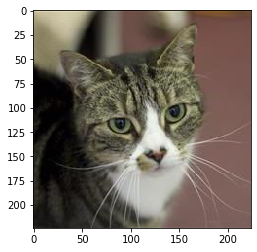

In [3]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'datasets/cat.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

In [5]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.mobilenet import preprocess_input

processed_image = preprocess_input(image_batch.copy())
predictions = mobilenet.predict(processed_image)
label = decode_predictions(predictions)
print(label)

40960/35363 [==================================] - 0s 1us/step
[[('n02124075', 'Egyptian_cat', 0.57827485), ('n02123045', 'tabby', 0.20764536), ('n02123159', 'tiger_cat', 0.1914985), ('n02127052', 'lynx', 0.012129134), ('n02883205', 'bow_tie', 0.0019031399)]]


In [6]:
from keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNet(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds=Dense(5, activation='softmax')(x)

/home/tumnus/venv/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 3s 0us/step


In [7]:
from keras.models import Model

model = Model(inputs=base_model.input, outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
__________

In [8]:
for layer in model.layers[: -5]:
    layer.trainable=False

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    './datasets/flower_photos/',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 3670 images belonging to 5 classes.


In [11]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

W0730 23:40:36.307600 139632331826816 deprecation_wrapper.py:119] From /home/tumnus/venv/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=train_generator.n/train_generator.batch_size,
    epochs=1
)

W0730 23:42:21.498300 139632331826816 deprecation.py:323] From /home/tumnus/venv/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
115/114 [==============================] - 97s 841ms/step - loss: 0.5771 - acc: 0.7881


In [16]:
print(train_generator.class_indices)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


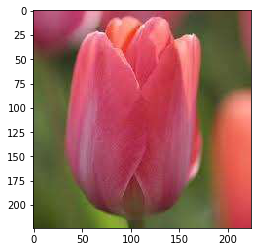

4


In [17]:
filename = 'datasets/tulipan.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = preprocess_input(image_batch.copy())
predictions = model.predict(processed_image)
print(np.argmax(predictions))